In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.max_columns=None

# EXERCICI 1

## Descargamos el dataset

In [374]:
df=pd.read_csv('DelayedFlights.csv')

## Creamos la muestra de 200.000 datos

In [375]:
sample=df.sample(200000)

## Exploramos y limpiamos los datos

In [376]:
sample.shape

(200000, 30)

In [377]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1359808 to 1079835
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   Year               200000 non-null  int64  
 2   Month              200000 non-null  int64  
 3   DayofMonth         200000 non-null  int64  
 4   DayOfWeek          200000 non-null  int64  
 5   DepTime            200000 non-null  float64
 6   CRSDepTime         200000 non-null  int64  
 7   ArrTime            199235 non-null  float64
 8   CRSArrTime         200000 non-null  int64  
 9   UniqueCarrier      200000 non-null  object 
 10  FlightNum          200000 non-null  int64  
 11  TailNum            200000 non-null  object 
 12  ActualElapsedTime  199110 non-null  float64
 13  CRSElapsedTime     199977 non-null  float64
 14  AirTime            199110 non-null  float64
 15  ArrDelay           199110 non-null  float64


In [378]:
sample.head(3)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1359808,4588015,2008,8,23,6,645.0,2251,1425.0,600,F9,889,N916FR,340.0,309.0,325.0,505.0,474.0,ANC,DEN,2406,7.0,8.0,0,N,0,474.0,0.0,31.0,0.0,0.0
478291,1501988,2008,3,13,4,1325.0,1315,1526.0,1528,EV,4174,N872AS,121.0,133.0,98.0,-2.0,10.0,MDT,ATL,619,14.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1250335,4184755,2008,7,18,5,1802.0,1755,1912.0,1908,CO,1689,N37255,190.0,193.0,159.0,4.0,7.0,IAH,SAN,1303,2.0,29.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [380]:
sample['Year'].unique()

array([2008])

In [382]:
np.sort(sample['Month'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [384]:
np.sort(sample['DayofMonth'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [385]:
np.sort(sample['DayOfWeek'].unique())

array([1, 2, 3, 4, 5, 6, 7])

In [386]:
sample['Cancelled'].value_counts()

0    199936
1        64
Name: Cancelled, dtype: int64

In [387]:
sample['CancellationCode'].value_counts()

N    199936
B        28
A        27
C         9
Name: CancellationCode, dtype: int64

In [388]:
sample['Diverted'].value_counts()

0    199174
1       826
Name: Diverted, dtype: int64

## Nuestro dataset está compuesto de las variables:  
### Variables relativas a la fecha  
-Year : El año 2008  
-Month : El mes de 1-12  
-DayofMonth : El día del mes de 1-31  
-DayOfWeek : El día de la semana de 1 a 7 

### Variables relativas a la identificación del vuelo  
-UniqueCarrier : El código de la aerolinia  
-FlightNum : El número del vuelo  
-TailNum : El número identificativo del avión  
-Origin : Código IATA aeropuerto origen  
-Dest : Código IATA aeropuerto destino  
-Distance : distancia en millas 

### Variables relativas a los horarios  en mn
-DepTime : La hora de salida  
-CRSDepTime : La hora prevista de salida  
-ArrTime : La hora de llegada  
-CRSArrTime : La hora prevista de llegada  

### Variables relativas al tiempo de vuelo en mn
-ActualElapsedTime : El tiempo total del vuelo  
-CRSElapsedTime : El tiempo total previsto del vuelo   
-AirTime : El tiempo volando  
-TaxiIn : El tiempo rodando para el aterrizaje  
-TaxiOut : El tiempo rodando para el despegue  
Nota : El tiempo total del vuelo es la suma AirTime+TaxiIn+TaxiOut    

### Variables relativas al retraso en mn
-ArrDelay : El retraso sobre la hora de llegada  
-DepDelay : El retraso sobre la hora de salida  
-CarrierDelay : El retraso imputable a la aerolinia  
-WeatherDelay : El retraso imputable a las condiciones meteologicas  
-NASDelay : El retraso imputable al operador del aeropuerto  
-SecurityDelay : El retraso imputable a problemas de seguridad  
-LateAircraftDelay : El retraso imputable a la llegada tardía del aparato  
Nota: Los 5 motivos de retraso suman el retraso en la llegada  

### Variables relativas al status del vuelo  
-Cancelled : Vuelo cancelado 1=Si, 0=No  
-CancellationCode : Motivo de cancelación  A,B,C  
-Diverted : Vuelo desviado 1=Si, 0=No  

## Detectamos las columnas que se pueden eliminar

In [390]:
sample['Unnamed: 0'].unique().size

200000

### Columna 0
-Unnamed: 0 : Es un número único que no nos aporta nada ya que tenemos el index

### Columnas relativas a la fecha 
-Year : El 2008, un único año, no nos aporta información en la tabla  

### Columnas relativas a los horarios 
-DepTime : La hora de salida  
-CRSDepTime : La hora prevista de salida  
-ArrTime : La hora de llegada  
-CRSArrTime : La hora prevista de llegada  
Las eliminamos todas, en principio los horarios sirven para determinar los tiempos por diferencia, ya disponemos de ellos.

### Columnas relativas al status del vuelo  
-CancellationCode : Motivo de cancelación A,B,C, como no disponemos de información acerca del motivo, y ya tenemos la columna Cancelled Si o No 
 

## Reorganizamos el dataset

In [467]:

n_sample=sample.reindex(columns=['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
        'FlightNum','TailNum','Origin','Dest', 'Distance','CRSElapsedTime', 
        'ActualElapsedTime', 'AirTime','TaxiIn','TaxiOut','ArrDelay', 'DepDelay',
        'Cancelled','Diverted','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'])

n_sample.head(2)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1359808,8,23,6,F9,889,N916FR,ANC,DEN,2406,309.0,340.0,325.0,7.0,8.0,505.0,474.0,0,0,474.0,0.0,31.0,0.0,0.0
478291,3,13,4,EV,4174,N872AS,MDT,ATL,619,133.0,121.0,98.0,14.0,9.0,-2.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN


# EXERCICI 2

## Resumen estadístico

In [396]:
n_sample.describe(include='all')

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,200000.000000,200000.00000,200000.000000,200000,200000.000000,200000,200000,200000,200000.000000,199977.000000,199110.000000,199110.000000,199235.000000,199949.000000,199110.000000,200000.000000,200000.000000,200000.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000
unique,NaN,NaN,NaN,20,NaN,5270,296,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,WN,NaN,N347SW,ATL,ORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,38953,NaN,109,13651,11346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.116675,15.78511,3.984810,NaN,2183.779500,NaN,NaN,NaN,765.903620,134.299994,133.343001,108.289152,6.816312,18.254940,42.200035,43.163865,0.000320,0.004130,19.201462,3.678695,15.150877,0.100277,25.127036
std,3.479048,8.78911,1.998011,NaN,1943.611064,NaN,NaN,NaN,574.103006,71.317073,72.033833,68.575563,5.271938,14.307568,57.154209,53.856446,0.017886,0.064132,44.774367,20.832017,34.238959,2.328833,41.654390
min,1.000000,1.00000,1.000000,NaN,1.000000,NaN,NaN,NaN,30.000000,1.000000,15.000000,2.000000,0.000000,0.000000,-59.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.00000,2.000000,NaN,612.000000,NaN,NaN,NaN,340.000000,82.000000,80.000000,58.000000,4.000000,10.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,16.00000,4.000000,NaN,1541.000000,NaN,NaN,NaN,606.000000,116.000000,116.000000,90.000000,6.000000,14.000000,25.000000,24.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,8.000000
75%,9.000000,23.00000,6.000000,NaN,3421.000000,NaN,NaN,NaN,998.000000,165.000000,165.000000,137.000000,8.000000,21.000000,56.000000,53.000000,0.000000,0.000000,21.000000,0.000000,15.000000,0.000000,33.000000


## Analísis estadístico

-En el año 2018 operaron 20 compañías aéreas en vuelos interiores de USA, la compañía con más vuelos siendo WN (SouthWest Airlines) con 38.953 vuelos (un 19,5% del total).  

-Los vuelos fueron operados por 5.270 aparatos diferentes, lo cual nos da una media de 38 vuelos por aparato, con un máximo de 109.  

-El tráfico interior se ha realizado entre 299 ciudades. El origen más frecuente ha sido Atlanta, con un 6,8% del total, y el destino más frecuente Chicago con un 5,7% del total, ambas ciudades foco de SouthWest Airlines.  

-La distancia media recorrida fue de 766 miles, con un 75% de los vuelos justo por debajo de 1000 miles. El vuelo más largo tuvo una distancia de 4.962 miles.  

-La duración media de los vuelos fue de 133 minutos versus una previsión de 134 minutos, es decir, de media, los vuelos (desde el inicio del despegue hasta la llegada a la terminal) no sufrieron retrasos en cuanto a duración del vuelo.  

-El tiempo medio volando fue de 108mn , y el tiempo rodando en pista de 18mn y 7mn para TaxiOut y TaxiIn respectivamente. Es decir, de media, cerca del 20% de la duración del vuelo se pasa con el avión rodando en pista. Además es importante notar que el TaxiOut dura de media más del doble del TaxiIn.  

-Analizando los datos medios del retraso en la salida y la llegada del avión, todo parece indicar que el retraso en la llegada se debe casi exclusivamente al retraso en la salida ya que les medias de retraso son idénticas (42mn y 43mn respectivamente).   

-Pero ojo, debemos tener en cuenta que las columnas DepDelay y ArrDelay no representan retrasos como tal sino la diferencia entre la hora prevista y la hora real. De manera que una llegada o salida antes de tiempo nos produce un retraso negativo, como bien nos indica el valor mínimo de -59mn. Por lo tanto, deberemos profundizar en el concepto de retraso con tal de poder llevar a cabo un análisis real de los retrasos y sus motivos.  




## Datos faltantes por columna

In [398]:
sample.isnull().sum()

Unnamed: 0               0
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                765
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      890
CRSElapsedTime          23
AirTime                890
ArrDelay               890
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 765
TaxiOut                 51
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         71107
WeatherDelay         71107
NASDelay             71107
SecurityDelay        71107
LateAircraftDelay    71107
dtype: int64

Según podemos interpretar, tendríamos 71.107 vuelos sin retraso desglosado por los 5 motivos antes descritos, los 128.893 vuelos restantes serían los vuelos con retraso efectivo, debemos confirmar este dato.  Son 128.893 los vuelos efectivamente retrasados? Cual es el criterio?

Podemos interpretar también que los 890 vuelos sin información sobre ArrDelay y DepDelay son los vuelos cancelados o desviados, debemos confirmar este dato también.

## Determinamos cuales son los vuelos considerados como retrasados

Filtramos los registros que tienen información sobre los 5 posibles motivos de retraso :

In [401]:
n_sample[(n_sample['CarrierDelay'].notnull())&(n_sample['WeatherDelay'].notnull())
                                    &(n_sample['SecurityDelay'].notnull())
                                 &(n_sample['NASDelay'].notnull())
                            &(n_sample['LateAircraftDelay'].notnull())].describe()


,Month,DayofMonth,DayOfWeek,FlightNum,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.0,128893.0,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000
mean,6.072820,15.768607,3.978525,2274.044921,742.770662,131.880032,135.537570,107.545701,7.301087,20.690782,63.258346,59.600785,0.0,0.0,19.201462,3.678695,15.150877,0.100277,25.127036
std,3.510155,8.804484,1.993656,1995.151299,559.785373,69.624792,72.378593,68.202885,6.038022,16.634466,61.280132,60.409982,0.0,0.0,44.774367,20.832017,34.238959,2.328833,41.654390
min,1.000000,1.000000,1.000000,1.000000,30.000000,15.000000,15.000000,2.000000,0.000000,0.000000,15.000000,6.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,637.000000,334.000000,80.000000,83.000000,58.000000,4.000000,11.000000,26.000000,24.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,16.000000,4.000000,1588.000000,595.000000,115.000000,119.000000,90.000000,6.000000,16.000000,43.000000,41.000000,0.0,0.0,2.000000,0.000000,2.000000,0.000000,8.000000
75%,9.000000,23.000000,6.000000,3669.000000,975.000000,161.000000,167.000000,136.000000,8.000000,24.000000,79.000000,75.000000,0.0,0.0,21.000000,0.000000,15.000000,0.000000,33.000000
max,12.000000,31.000000,7.000000,9740.000000,4962.000000,660.000000,724.000000,654.000000,199.000000,342.000000,2453.000000,2467.000000,0.0,0.0,2436.000000,1049.000000,1357.000000,357.000000,889.000000


Confirmamos que los vuelos con información desglosada sobre el retraso son efectivamente 128.893.  

El mínimo de 15mn de la columna ArrDelay nos indica que **los vuelos considerados como retrasados son todos aquellos cuya hora de llegada es igual o superior en 15mn a la prevista**.Este es el criterio que seguiremos entonces para el resto del ejercicio.

## Incorporamos nuevas columnas de interés

In [418]:
p_sample=n_sample

### Creamos una variable nueva que nos indica el status del vuelo : retrasado, on-time, cancelado, desviado

In [419]:
p_sample['Cancelled']=n_sample['Cancelled'].replace   ({1: 'C', 0: '' })
p_sample.sort_values('Cancelled',ascending=False).head(2)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1777364,12,19,5,XE,3075,N13995,EWR,PVD,160,53.0,NaN,NaN,NaN,NaN,NaN,24.0,C,0,NaN,NaN,NaN,NaN,NaN
1826163,12,17,3,US,1072,N119US,SAN,LAS,258,76.0,NaN,NaN,NaN,NaN,NaN,15.0,C,0,NaN,NaN,NaN,NaN,NaN


In [420]:
p_sample['Diverted']=p_sample['Diverted'].replace({1: 'D', 0: '' })
p_sample.sort_values('Diverted',ascending=False).head(2)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
911036,6,24,2,WN,11,N693SW,DAL,HOU,239,60.0,NaN,NaN,NaN,7.0,NaN,19.0,,D,NaN,NaN,NaN,NaN,NaN
422499,3,18,2,XE,2927,N23139,RSW,IAH,861,175.0,NaN,NaN,NaN,14.0,NaN,300.0,,D,NaN,NaN,NaN,NaN,NaN


In [421]:
def delayed_function(x):
    if x>=15:
        return 'S'
    else:
        return 'N'
    
p_sample['Delayed']=p_sample['ArrDelay'].apply(delayed_function)

p_sample.head(2)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
1359808,8,23,6,F9,889,N916FR,ANC,DEN,2406,309.0,340.0,325.0,7.0,8.0,505.0,474.0,,,474.0,0.0,31.0,0.0,0.0,S
478291,3,13,4,EV,4174,N872AS,MDT,ATL,619,133.0,121.0,98.0,14.0,9.0,-2.0,10.0,,,NaN,NaN,NaN,NaN,NaN,N


In [422]:
p_sample['Status']=p_sample['Delayed']+p_sample['Cancelled']+p_sample['Diverted']
p_sample['Status'].value_counts()

S     128893
N      70217
ND       826
NC        64
Name: Status, dtype: int64

In [423]:
p_sample.head(2)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed,Status
1359808,8,23,6,F9,889,N916FR,ANC,DEN,2406,309.0,340.0,325.0,7.0,8.0,505.0,474.0,,,474.0,0.0,31.0,0.0,0.0,S,S
478291,3,13,4,EV,4174,N872AS,MDT,ATL,619,133.0,121.0,98.0,14.0,9.0,-2.0,10.0,,,NaN,NaN,NaN,NaN,NaN,N,N


Confirmamos que el status de los 200.000 vuelos es el siguiente:  

S  Vuelos retrasados (más de 15mn) : 128.893  
N  Vuelos on-time : 70.217  
ND Vuelos desviados : 826  
NC Vuelos cancelados : 64 

Es decir, cerca de un 65% de los vuelos sufrieron en 2008 un retraso superior a 15mn.

<AxesSubplot:title={'center':'status'}>

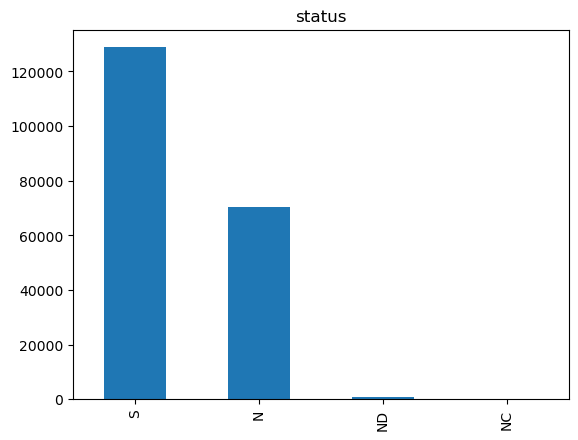

In [442]:
p_sample['Status'].value_counts().plot(kind='bar',title='status')

### Creamos una variable nueva correspondiente a la velocidad del vuelo

In [425]:
p_sample['Velocidad']=p_sample['Distance']/p_sample['ActualElapsedTime']*60
p_sample.head(2)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed,Status,Velocidad
1359808,8,23,6,F9,889,N916FR,ANC,DEN,2406,309.0,340.0,325.0,7.0,8.0,505.0,474.0,,,474.0,0.0,31.0,0.0,0.0,S,S,424.588235
478291,3,13,4,EV,4174,N872AS,MDT,ATL,619,133.0,121.0,98.0,14.0,9.0,-2.0,10.0,,,NaN,NaN,NaN,NaN,NaN,N,N,306.942149


### Creamos una variable nueva correspondiente a la diferencia entre tiempo de vuelo previsto y tiempo real 

In [426]:
p_sample['DifElapsedTime']=p_sample['ActualElapsedTime']-p_sample['CRSElapsedTime']
p_sample.head(2)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed,Status,Velocidad,DifElapsedTime
1359808,8,23,6,F9,889,N916FR,ANC,DEN,2406,309.0,340.0,325.0,7.0,8.0,505.0,474.0,,,474.0,0.0,31.0,0.0,0.0,S,S,424.588235,31.0
478291,3,13,4,EV,4174,N872AS,MDT,ATL,619,133.0,121.0,98.0,14.0,9.0,-2.0,10.0,,,NaN,NaN,NaN,NaN,NaN,N,N,306.942149,-12.0


### Creamos una variable nueva correspondiente a la routa entre 2 ciudades


In [427]:
p_sample['Route']=p_sample['Origin']+p_sample['Dest']
p_sample.head(2)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed,Status,Velocidad,DifElapsedTime,Route
1359808,8,23,6,F9,889,N916FR,ANC,DEN,2406,309.0,340.0,325.0,7.0,8.0,505.0,474.0,,,474.0,0.0,31.0,0.0,0.0,S,S,424.588235,31.0,ANCDEN
478291,3,13,4,EV,4174,N872AS,MDT,ATL,619,133.0,121.0,98.0,14.0,9.0,-2.0,10.0,,,NaN,NaN,NaN,NaN,NaN,N,N,306.942149,-12.0,MDTATL


## Analizamos en profundidad los vuelos retrasados

### Creamos una tabla nueva excluyendo vuelos cancelados y desviados y manteniendo solamente columnas de interés

In [428]:
p_sample.columns.values

array(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'Origin', 'Dest', 'Distance', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'TaxiIn', 'TaxiOut', 'ArrDelay',
       'DepDelay', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Delayed', 'Status', 'Velocidad', 'DifElapsedTime', 'Route'],
      dtype=object)

In [468]:

r_sample=p_sample.reindex(columns= ['Distance','Origin','Dest','Route','Velocidad',
       'CRSElapsedTime','ActualElapsedTime','DifElapsedTime','AirTime', 'TaxiIn', 
       'TaxiOut', 'ArrDelay','DepDelay','CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','Status'])

r_sample.head(2)

,Distance,Origin,Dest,Route,Velocidad,CRSElapsedTime,ActualElapsedTime,DifElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
1359808,2406,ANC,DEN,ANCDEN,424.588235,309.0,340.0,31.0,325.0,7.0,8.0,505.0,474.0,474.0,0.0,31.0,0.0,0.0,S
478291,619,MDT,ATL,MDTATL,306.942149,133.0,121.0,-12.0,98.0,14.0,9.0,-2.0,10.0,NaN,NaN,NaN,NaN,NaN,N


### Comparamos datasets de vuelos retrasados con dataset de vuelos no retrasados

In [434]:
DelayedFlights=r_sample[r_sample['Status']=='S']
DelayedFlights.describe()

,Distance,Velocidad,CRSElapsedTime,ActualElapsedTime,DifElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000,128893.000000
mean,742.770662,301.538987,131.880032,135.537570,3.657538,107.545701,7.301087,20.690782,63.258346,59.600785,19.201462,3.678695,15.150877,0.100277,25.127036
std,559.785373,89.901216,69.624792,72.378593,18.954999,68.202885,6.038022,16.634466,61.280132,60.409982,44.774367,20.832017,34.238959,2.328833,41.654390
min,30.000000,26.800000,15.000000,15.000000,-78.000000,2.000000,0.000000,0.000000,15.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,334.000000,240.000000,80.000000,83.000000,-7.000000,58.000000,4.000000,11.000000,26.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,595.000000,307.804878,115.000000,119.000000,0.000000,90.000000,6.000000,16.000000,43.000000,41.000000,2.000000,0.000000,2.000000,0.000000,8.000000
75%,975.000000,366.845638,161.000000,167.000000,10.000000,136.000000,8.000000,24.000000,79.000000,75.000000,21.000000,0.000000,15.000000,0.000000,33.000000
max,4962.000000,748.235294,660.000000,724.000000,320.000000,654.000000,199.000000,342.000000,2453.000000,2467.000000,2436.000000,1049.000000,1357.000000,357.000000,889.000000


In [435]:
NDelayedFlights=r_sample[r_sample['Status']=='N']
NDelayedFlights.describe()

,Distance,Velocidad,CRSElapsedTime,ActualElapsedTime,DifElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,70217.000000,70217.000000,70217.000000,70217.000000,70217.00000,70217.000000,70217.000000,70217.000000,70217.000000,70217.000000,0.0,0.0,0.0,0.0,0.0
mean,806.312702,340.591407,138.449677,129.314568,-9.13511,109.653859,5.921144,13.739564,3.544597,12.679707,NaN,NaN,NaN,NaN,NaN
std,595.451217,84.805860,73.811260,71.221381,8.50209,69.234160,3.239707,6.262256,7.833514,6.417462,NaN,NaN,NaN,NaN,NaN
min,31.000000,61.250000,24.000000,16.000000,-82.00000,6.000000,0.000000,0.000000,-59.000000,6.000000,NaN,NaN,NaN,NaN,NaN
25%,364.000000,286.470588,84.000000,76.000000,-14.00000,58.000000,4.000000,9.000000,-1.000000,8.000000,NaN,NaN,NaN,NaN,NaN
50%,640.000000,347.500000,120.000000,112.000000,-8.00000,92.000000,5.000000,12.000000,5.000000,11.000000,NaN,NaN,NaN,NaN,NaN
75%,1045.000000,400.882353,170.000000,160.000000,-3.00000,139.000000,7.000000,16.000000,10.000000,16.000000,NaN,NaN,NaN,NaN,NaN
max,4962.000000,643.225806,660.000000,662.000000,8.00000,627.000000,47.000000,101.000000,14.000000,94.000000,NaN,NaN,NaN,NaN,NaN


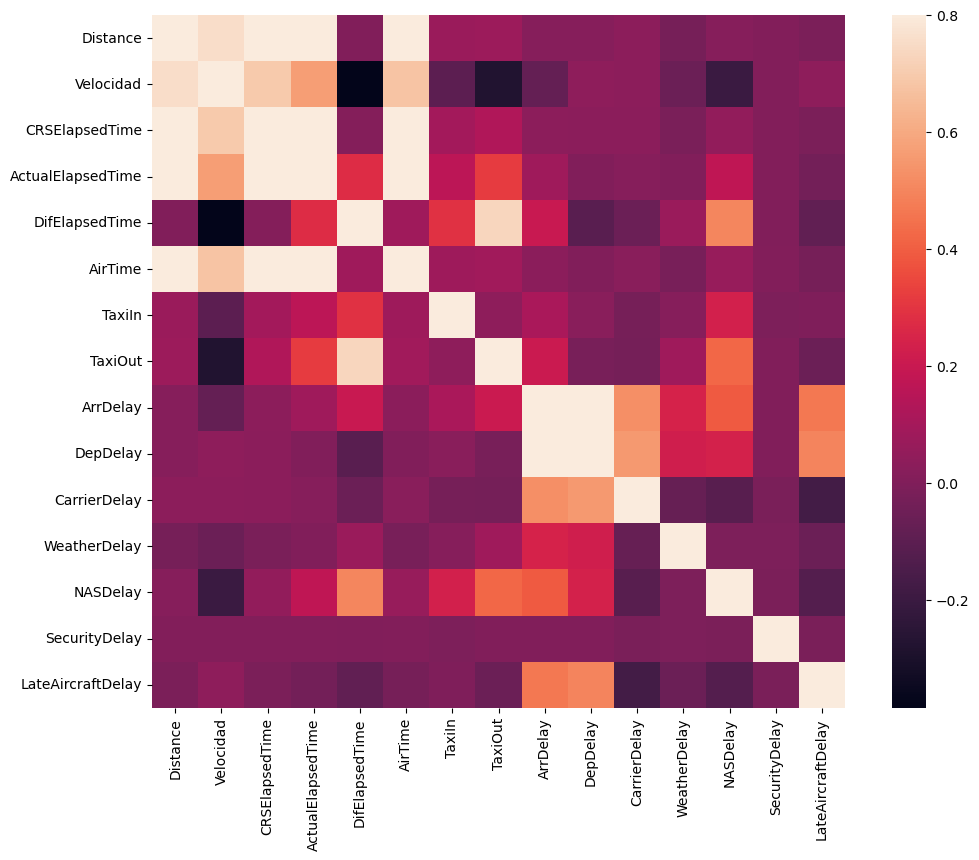

In [436]:
#correlation matrix
corrmat=DelayedFlights.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [437]:
DelayedFlights.corr()['ArrDelay']

Distance             0.017714
Velocidad           -0.077731
CRSElapsedTime       0.034457
ActualElapsedTime    0.085585
DifElapsedTime       0.200239
AirTime              0.030636
TaxiIn               0.114732
TaxiOut              0.205135
ArrDelay             1.000000
DepDelay             0.951575
CarrierDelay         0.523992
WeatherDelay         0.244283
NASDelay             0.390092
SecurityDelay        0.004397
LateAircraftDelay    0.464854
Name: ArrDelay, dtype: float64

En base al análisis estadístico y la matriz de correlación podemos concluir que:  

-De media los vuelos retrasados tienen una distancia de recorrido inferior a los vuelos no retrasados, aunque su duración es muy parecida, debido a que su velocidad es un 10% superior.  

-El retraso medio de los vuelos retrasados es de una hora, si consideramos que la duración media del vuelo es de 2 horas, el retraso representa incrementar la duración del vuelo en un 50%....  

-La importancia del retraso en la llegada tiene una correlación muy fuerte de 0,95 con el retraso en la salida, y en cambio no tiene correlación con la velocidad, la distancia, la duración del vuelo...es decir, los vuelos se retrasan por no salir a tiempo del aeropuerto de origen, debido a motivos, por orden, de retraso provocado por la aerolinia y el operador del aeropuerto.

In [452]:
s_sample=p_sample[p_sample['Status']=='S']

#### Tabla de las aerolinias con más vuelos retrasados acumulados (representan el 50% del total)

In [453]:
s_sample['UniqueCarrier'].value_counts().head(5)

WN    20947
AA    13730
MQ    10206
UA     9689
OO     9147
Name: UniqueCarrier, dtype: int64

#### Tabla de los vuelos más largos

In [454]:
p_sample.sort_values('ActualElapsedTime',ascending=False).head(10)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed,Status,Velocidad,DifElapsedTime,Route
1250037,7,27,7,CO,15,N66051,EWR,HNL,4962,635.0,724.0,594.0,10.0,120.0,131.0,42.0,,,20.0,0.0,89.0,0.0,22.0,S,S,411.215470,89.0,EWRHNL
1928078,12,16,2,CO,15,N76054,EWR,HNL,4962,660.0,683.0,637.0,7.0,39.0,47.0,24.0,,,24.0,0.0,23.0,0.0,0.0,S,S,435.900439,23.0,EWRHNL
556379,3,19,3,CO,15,N66051,EWR,HNL,4962,660.0,672.0,654.0,5.0,13.0,18.0,6.0,,,6.0,0.0,12.0,0.0,0.0,S,S,443.035714,12.0,EWRHNL
1069177,6,16,1,CO,15,N69059,EWR,HNL,4962,635.0,669.0,642.0,4.0,23.0,42.0,8.0,,,8.0,0.0,34.0,0.0,0.0,S,S,445.022422,34.0,EWRHNL
556372,3,12,3,CO,15,N59053,EWR,HNL,4962,660.0,667.0,641.0,4.0,22.0,21.0,14.0,,,0.0,0.0,21.0,0.0,0.0,S,S,446.356822,7.0,EWRHNL
360599,2,4,1,CO,15,N69063,EWR,HNL,4962,660.0,662.0,642.0,7.0,13.0,40.0,38.0,,,38.0,0.0,2.0,0.0,0.0,S,S,449.728097,2.0,EWRHNL
179556,1,31,4,CO,15,N68061,EWR,HNL,4962,660.0,662.0,627.0,8.0,27.0,12.0,10.0,,,NaN,NaN,NaN,NaN,NaN,N,N,449.728097,2.0,EWRHNL
556384,3,25,2,CO,15,N66057,EWR,HNL,4962,660.0,659.0,632.0,10.0,17.0,61.0,62.0,,,0.0,0.0,0.0,0.0,61.0,S,S,451.775417,-1.0,EWRHNL
1070004,6,5,4,CO,15,N76054,EWR,HNL,4962,635.0,658.0,606.0,7.0,45.0,123.0,100.0,,,100.0,0.0,23.0,0.0,0.0,S,S,452.462006,23.0,EWRHNL
1730191,11,2,7,CO,15,N76055,EWR,HNL,4962,660.0,657.0,623.0,11.0,23.0,6.0,9.0,,,NaN,NaN,NaN,NaN,NaN,N,N,453.150685,-3.0,EWRHNL


#### Tabla de los vuelos más retrasados

In [455]:
s_sample.sort_values('ArrDelay',ascending=False).head(10)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed,Status,Velocidad,DifElapsedTime,Route
686014,4,10,4,NW,1699,N3324L,CLT,MSP,930,168.0,154.0,132.0,8.0,14.0,2453.0,2467.0,,,2436.0,0.0,0.0,0.0,17.0,S,S,362.337662,-14.0,CLTMSP
1881639,12,19,5,NW,357,N366NW,BOS,MSP,1124,201.0,259.0,192.0,8.0,59.0,1655.0,1597.0,,,1307.0,0.0,58.0,0.0,290.0,S,S,260.386100,58.0,BOSMSP
1497823,9,1,1,NW,512,N322US,OMA,MSP,282,71.0,102.0,75.0,4.0,23.0,1583.0,1552.0,,,1552.0,0.0,31.0,0.0,0.0,S,S,165.882353,31.0,OMAMSP
1214839,7,16,3,NW,804,N596NW,SEA,MSP,1399,193.0,185.0,160.0,7.0,18.0,1510.0,1518.0,,,1510.0,0.0,0.0,0.0,0.0,S,S,453.729730,-8.0,SEAMSP
521096,3,21,5,NW,1743,N786NC,BNA,MEM,200,66.0,66.0,47.0,5.0,14.0,1490.0,1490.0,,,1490.0,0.0,0.0,0.0,0.0,S,S,181.818182,0.0,BNAMEM
1380381,8,28,4,NW,624,N376NW,ABQ,MSP,981,153.0,145.0,124.0,7.0,14.0,1359.0,1367.0,,,1359.0,0.0,0.0,0.0,0.0,S,S,405.931034,-8.0,ABQMSP
154597,1,16,3,AA,1274,N3ASAA,DEN,DFW,641,105.0,107.0,86.0,13.0,8.0,1357.0,1355.0,,,0.0,0.0,1357.0,0.0,0.0,S,S,359.439252,2.0,DENDFW
349850,2,5,2,AA,2233,N512AA,RSW,STL,979,160.0,156.0,141.0,3.0,12.0,1312.0,1316.0,,,1312.0,0.0,0.0,0.0,0.0,S,S,376.538462,-4.0,RSWSTL
1909103,12,27,6,AA,2228,N624AA,HDN,DFW,769,130.0,129.0,98.0,7.0,24.0,1279.0,1280.0,,,993.0,0.0,0.0,0.0,286.0,S,S,357.674419,-1.0,HDNDFW
517172,3,2,7,NW,804,N593NW,KOA,SEA,2688,331.0,335.0,312.0,4.0,19.0,1202.0,1198.0,,,1198.0,0.0,4.0,0.0,0.0,S,S,481.432836,4.0,KOASEA


#### Tabla de las rutas más largas

In [470]:
p_sample.groupby('Route').agg(np.mean).sort_values('Distance',
                                                   ascending=False)['Distance'].head(15)

Route
HNLEWR    4962.0
EWRHNL    4962.0
ATLHNL    4502.0
HNLATL    4502.0
HNLORD    4243.0
ORDHNL    4243.0
KOAORD    4213.0
ORDOGG    4184.0
MSPHNL    3972.0
HNLMSP    3972.0
IAHHNL    3904.0
HNLIAH    3904.0
DFWHNL    3784.0
HNLDFW    3784.0
DFWOGG    3711.0
Name: Distance, dtype: float64

#### Tabla de las rutas con más vuelos retrasados

In [471]:
s_sample.groupby('Route').agg(np.size).sort_values('Distance',
                                                   ascending=False)['Distance'].head(10)


Route
ORDLGA    331
LAXSFO    331
ATLLGA    310
SFOLAX    305
ATLEWR    286
LGAORD    275
ORDEWR    258
LGAATL    249
LASLAX    233
DFWORD    231
Name: Distance, dtype: int64

# EXERCICI 3

In [472]:
p_sample.to_excel('NuevoDataset.xlsx')